<a href="https://colab.research.google.com/github/DanielaNavaGarcia/programas-m-todos-/blob/main/Interpolaci%C3%B3n_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importacion de librerias
import numpy as np                
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
#INTERPOLACION METODO DE NEWTON

#Define función para la interpolación      
def InterpolNewton(x, y, xi):
  n = len(x)

  #1) Matriz de diferencias divididas

  dd = np.zeros([n, n])       #Matriz de las diferencias divididas
  b = []                      #diagonal de la matriz de diferencias divididas
  for i in range (n):
    for j in range (n):
      if j == 0:
        dd[i, j] = y[i]       #La primera columna de la matriz corresponde a f[x]
      elif i<j:
        dd[i, j] = dd[i, j]   #hacer NADA
      else:
        dd[i, j] = (dd[i, j-1] - dd[i - 1, j-1])/(x[i] - x[i - j]) #Calculo de diferencias divididas

      if i == j:
        b.append(dd[i, j])    #Coeficiente 'b'


  #2) Polinomio de interpolación b0 + b1(x - x0) + b2(x - x0)(x - x1) + b3(x - x0)(x - x1)(x - x2)…
  
  xterm = []          #Terminos del polinomio numericos (x - x_0)(x - x_1)...(x - x_n-1)
  xterm_simbol = []   #Terminos del polinomio simbolicos (x - x_0)(x - x_1)...(x - x_n-1)
  pol = []            #Polinomio de interpolacion numerico b0 + b1(x - x0) + b2(x - x0)(x - x1) + b3(x - x0)(x - x1)(x - x2)…
  pol_simbol = []     #Polinomio de interpolacion simbolico b0 + b1(x - x0) + b2(x - x0)(x - x1) + b3(x - x0)(x - x1)(x - x2)…
  Rn = []             #Residual
  I = []              #Grado del polinomio
  
  for i in range(n):
    I.append(i)
    if i == 0:
      xterm.append(1)
      xterm_simbol.append('1')
      pol.append(b[i]*xterm[i])
      pol_simbol.append(str(b[i]))
    else:
      xterm.append(xterm[i-1] * (xi - x[i - 1]))
      xterm_simbol.append(str(xterm_simbol[i-1]) + '(x - ' + str(x[i - 1]) + ')')
      pol.append(pol[i - 1] + b[i]*xterm[i])
      pol_simbol.append(str(pol_simbol[i-1]) + ' + ' + str(b[i]) + str(xterm_simbol[i]))
      Rn.append(abs((pol[i] - pol[i - 1])))

  Rn.append('--')
  

  #3) Tablas de resultados

  table0 = []                   #Tabla interpolacion de newton
  table1 = []                   #Tabla polinomios de interpolacion

  for i in range (n):           #llena la tabla de datos
    table0.append([I[i], x[i], y[i], b[i], xterm[i], pol[i], Rn[i]] )
    table1.append([I[i], pol_simbol[i]])

  print("POLINOMIOS DE INTERPOLACION DE NEWTON")
  print( " ")
  print("Tabla de resultados")
  print(tabulate(table0, headers = ["n", "x", "y", "b", "(xh - x0 )(xh - x1) … (xh - xn-1)", "y interpolacion", "Rn" ]))       #Imprime la tabla
  print(" ")
  print("Polinomios de interpolacion")
  print(tabulate(table1, headers = ["n","f(x)"]))
  print(" ")
  print("Tabla de diferencias divididas")
  print("f[x], f[xi, xj], f[xi, xj, xk], f[xi, xj, xk, xl], f[xi, xj, xk, xl, xm], f[xi, xj, xk, xl, xm, xn]...")  
  print(" ")
  print(tabulate(dd))

      
  return(I, x, dd, b, xterm, pol, xterm_simbol, pol_simbol )


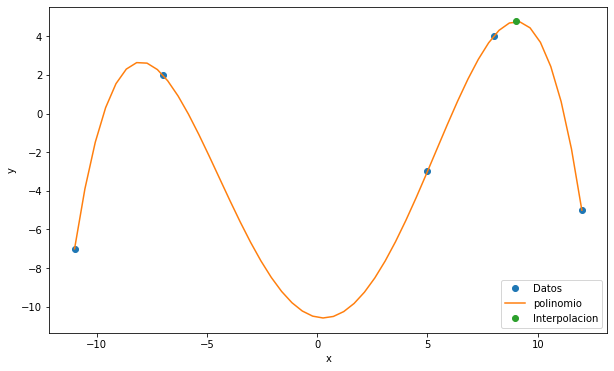

In [ ]:
#GRAFICA DE INTERPOLACION
xpol = np.linspace(min(x), max(x), 50)  #valores del eje x para graficar
n = 4                                   #Grado del polinomio

xterm = []                              #Terminos del polinomio numericos (x - x_0)(x - x_1)...(x - x_n-1)
ypol = np.zeros(len(xpol))               #Polinomio de interpolacion numerico b0 + b1(x - x0) + b2(x - x0)(x - x1) + b3(x - x0)(x - x1)(x - x2)… 
for i in range(len(xpol)):
  for j in range(n+1):
    if j == 0:
      xterm = 1
      ypol[i] = b[0]
    else:
      xterm = xterm*(xpol[i] - x[j-1])
      ypol[i] = ypol[i] + b[j]*xterm

#ypol=-7.0 + 2.251*(xpol - -11) + -0.166666666666666661*(xpol - -11)*(xpol - -7) + 0.0184210526315789461*(xpol - -11)*(xpol - -7)*(xpol - 5) + -0.0027187534052522611*(xpol - -11)*(xpol - -7)*(xpol - 5)*(xpol - 8)

#Grafica
plt.figure(figsize=(10,6))
plt.plot(x, y, "o", label = 'Datos')                #Grafica de los datos de entrada
plt.plot(xpol, ypol, label = 'polinomio')                     #Grafica del polinomio de interpolacion
plt.plot(xi, pol[len(pol)-1], "o", label = 'Interpolacion')                #Grafica de los datos de entrada
plt.xlabel("x")
plt.ylabel("y")
#plt.title("")
#plt.grid()
plt.legend (loc = 4)
plt.show()

In [ ]:
pol

[-7.0, 38.0, -15.333333333333329, 8.245614035087723, 4.765609676364829]